In [22]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



import warnings
warnings.filterwarnings('ignore')



In [42]:
#Dataset Sales
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Task/main/Test_Sales_LinReg.csv')
data.head()
data.shape
data.info()
data



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Republic  295 non-null    float64
 1   NDTV      300 non-null    float64
 2   TV5       305 non-null    float64
 3   TV9       297 non-null    float64
 4   AajTak    300 non-null    float64
 5   sales     305 non-null    float64
dtypes: float64(6)
memory usage: 14.4 KB


,Republic,NDTV,TV5,TV9,AajTak,sales
0,8.7,48.9,4.0,75.0,49.0,7.2
1,57.5,32.8,65.9,23.5,57.5,11.8
2,120.2,19.6,7.2,11.6,18.5,13.2
3,8.6,2.1,46.0,1.0,2.6,4.8
4,199.8,2.6,52.9,21.2,2.9,10.6
...,...,...,...,...,...,...
300,286.0,13.9,35.2,3.7,13.9,15.9
301,18.7,12.1,23.7,23.4,18.7,6.7
302,39.5,41.1,17.6,5.8,39.5,10.8
303,75.5,10.8,8.3,6.0,75.5,9.9


In [7]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,295.000000,300.000000,305.000000,297.000000,300.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,87.330161,14.781927,20.290023,21.411180,15.853789,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,74.050000,9.125000,15.900000,10.900000,10.000000,10.300000
50%,149.800000,21.050000,26.200000,23.500000,21.300000,12.800000
75%,221.450000,35.650000,39.600000,43.000000,36.900000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


In [8]:
#Documentation
#There are few null values in Republic, NDTV,TV9 and AajTak, so we got to do the data 
#cleaning of filling up the values with the mean values of the respective columns.
data['Republic']=data['Republic'].fillna(data['Republic'].mean())
data['NDTV']=data['NDTV'].fillna(data['NDTV'].mean())
data['TV9']=data['TV9'].fillna(data['TV9'].mean())
data['AajTak']=data['AajTak'].fillna(data['AajTak'].mean())



In [9]:
data.describe()

,Republic,NDTV,TV5,TV9,AajTak,sales
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,148.136610,22.341333,29.459344,28.862626,23.517967,13.811475
std,85.881799,14.659861,20.290023,21.127576,15.722872,5.192185
min,0.700000,0.300000,0.300000,0.300000,0.300000,1.600000
25%,75.100000,9.300000,15.900000,11.000000,10.100000,10.300000
50%,148.136610,21.300000,26.200000,24.200000,21.700000,12.800000
75%,220.300000,35.600000,39.600000,41.800000,36.800000,17.200000
max,296.400000,49.400000,114.000000,114.000000,75.500000,27.000000


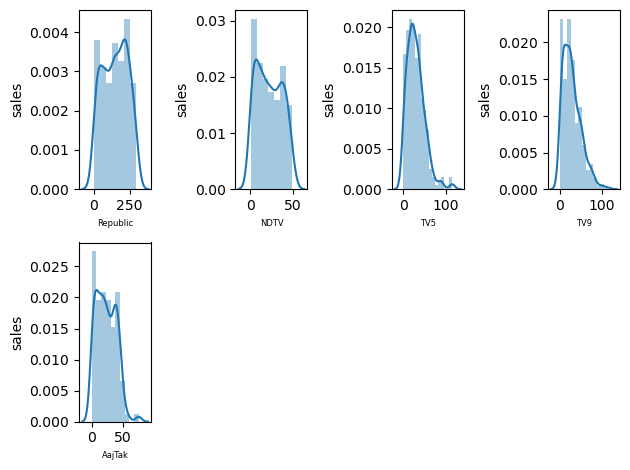

In [41]:
#Distritubtion graph to see the relationship between the features and sales
plt.figure
plotnumber = 1
  
for column in data:
       if plotnumber<=5:
            ax=plt.subplot(2,4,plotnumber)
            sns.distplot(data[column])
            plt.xlabel(column,fontsize=6)
            plt.ylabel('sales')
            plotnumber+=1
            plt.tight_layout()
            y=data['sales']
            x=data.drop(columns=['sales'])
            
            
        

            

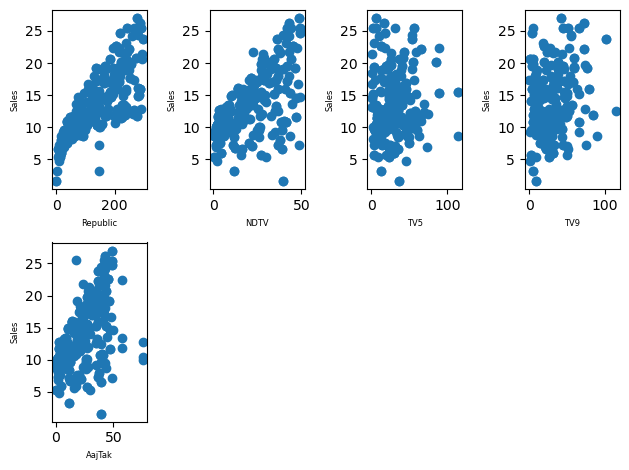

In [40]:
#There is slight skewnesss in relation to Republic , NDTV and AajTak in relationship to sales
plt.figure
plotnumber=1
for column in x:
        if plotnumber<=5:
            ax=plt.subplot(2,4,plotnumber)
            plt.scatter(x[column],y)
            plt.xlabel(column,fontsize=6)
            plt.ylabel('Sales',fontsize=6)
            plotnumber+=1
            plt.tight_layout()


In [64]:
#Relationship between label and features doesnt look fairy linear.We can see a linear trend line with republic,NDTv to sales.
#So our linearity assumption is not satified. We can conclude from scatter that republic and NDTV telecast mostly reach
#reach out people and we can go ahead in investing our money into these two TV channels
X=data[['Republic','NDTV','TV5','TV9','AajTak']]
y=data.sales
linereg=LinearRegression()
linereg




LinearRegression()

In [63]:

linereg.fit (X,y)
print('Intercept:  ',linereg.intercept_)
print('Republic:  ',linereg.coef_[0])
print('NDTV:  ',linereg.coef_[1])
print('TV5:  ',linereg.coef_[2])
print('TV9:  ',linereg.coef_[3])
print('Aajtak:  ',linereg.coef_[4])


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [59]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.59937351,  1.7997005 , -1.25683363,  2.15846313,  1.61000056],
       [-1.03962506,  0.70871282,  1.79894035, -0.25088188,  2.1470458 ],
       [-0.32044005, -0.18576155, -1.09886147, -0.80760432, -0.31704413],
       ...,
       [-1.24608965,  1.27114747, -0.58545195, -1.07894803,  1.00977352],
       [-0.83316046, -0.78207779, -1.04455854, -1.06959135,  3.28431808],
       [-1.50187635, -1.2360913 ,  0.02669017,  0.12806365, -0.39918046]])

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=325)
y_train.head()

207    21.8
2      13.2
202     7.2
281    22.6
177     9.9
Name: sales, dtype: float64

In [61]:
regression=LinearRegression()
regression.fit(x_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values